In [80]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sangetha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Takehome_users

In [2]:
df = pd.read_csv("takehome_users.csv",encoding='latin-1')

In [3]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [58]:
df.shape

(4776, 10)

In [6]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [7]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [8]:
df = df.dropna(subset = ['last_session_creation_time'])

In [9]:
df = df.dropna(subset = ['invited_by_user_id'])

In [29]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


#### creation_time

In [18]:
df.creation_time.values[0]

'2014-04-22 03:53:30'

In [19]:
df.creation_time = pd.to_datetime(df.creation_time, format='%Y-%m-%d %H:%M:%S')

In [27]:
df.creation_time

0       2014-04-22 03:53:30
1       2013-11-15 03:45:04
2       2013-03-19 23:14:52
3       2013-05-21 08:09:28
4       2013-01-17 10:14:20
                ...        
11980   2013-03-05 01:53:48
11981   2013-12-06 14:39:15
11989   2013-07-05 21:00:48
11995   2013-09-06 06:14:15
11997   2014-04-27 12:45:16
Name: creation_time, Length: 4776, dtype: datetime64[ns]

#### creation_source

In [88]:
df.creation_source = df.creation_source.map({'GUEST_INVITE':0,'ORG_INVITE':1})

#### last_session_creation_time

In [11]:
df.last_session_creation_time.values[0]

1398138810.0

In [37]:
df.last_session_creation_time = [datetime.fromtimestamp(item) for item in df.last_session_creation_time]

In [41]:
df.last_session_creation_time.values[0]

numpy.datetime64('2014-04-22T09:23:30.000000000')

#### opted_in_to_mailing_list

In [44]:
df.opted_in_to_mailing_list.value_counts()

0    3558
1    1218
Name: opted_in_to_mailing_list, dtype: int64

<AxesSubplot:>

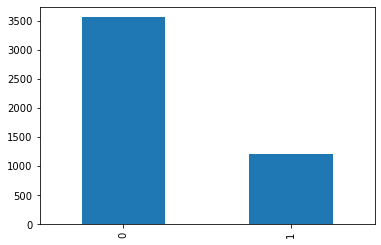

In [45]:
df.opted_in_to_mailing_list.value_counts().plot(kind='bar')

#### enabled_for_marketing_drip

In [33]:
df.enabled_for_marketing_drip.value_counts()

0    4045
1     731
Name: enabled_for_marketing_drip, dtype: int64

<AxesSubplot:>

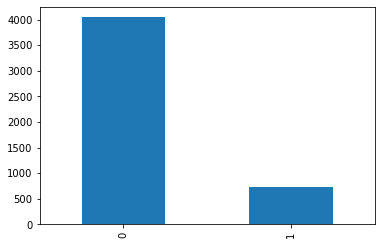

In [43]:
df.enabled_for_marketing_drip.value_counts().plot(kind='bar')

In [67]:
df.invited_by_user_id.values[0]

10803.0

In [68]:
df.invited_by_user_id = df.invited_by_user_id.astype("int64")

In [69]:
df.invited_by_user_id.values[0]

10803

In [89]:
df.head(7)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 09:23:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 09:15:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-20 04:44:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 13:39:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 15:44:20,0,0,193,5240
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,0,2013-12-19 09:07:06,0,0,197,11241
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,2014-06-04 03:38:03,1,1,318,4143


## Takehome_user_engagement

In [57]:
df1 = pd.read_csv("takehome_user_engagement.csv")

In [4]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [59]:
df1.shape

(207917, 3)

In [71]:
df1 = df1.drop_duplicates()

In [74]:
df1.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

C:\Users\Sangetha\AppData\Local\Temp\ipykernel_6884\2477560760.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_10 = df1['user_id'].value_counts()[:10]


Text(0.5, 1.0, 'Top 10 users who logs-in frequently')

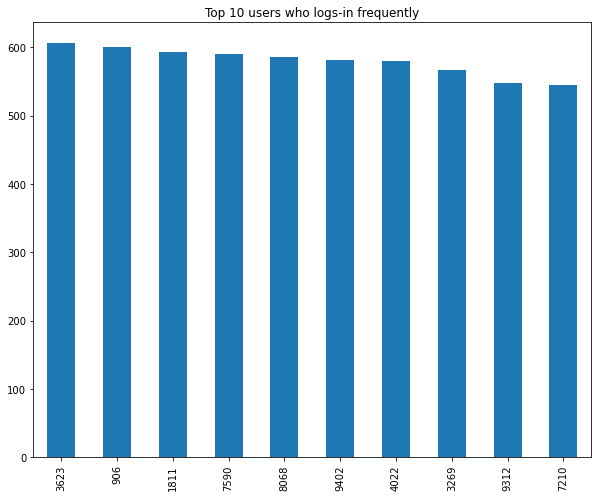

In [86]:
top_10 = df1['user_id'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 users who logs-in frequently')